---


This research is to help  prioritize  hypotheses, launch an A/B test, and analyze the results that may help boost revenue.

##### Table of Contents
* <a href="#Step 1"> Download the data and prepare it for analysis ></a><br>
    * <a href="#Part 1">Prioritizing Hypothesis</a><br>
        * <a href="#ICE">ICE framework</a><br>
        * <a href="#RICE">RICE framework</a><br>
        * <a href="#hypothesis">Prioritized hypothesis</a><br>
    * <a href="#Part 2"> A/B Test Analysis </a><br>
        * <a href="#cummrev">Cumulative revenue by group</a><br>
        * <a href="#cummavg">Cumulative avergae order</a><br>
        * <a href="#reldiff">Relative Difference in comulative average</a><br>
        * <a href="#conversionrate">User's conversion rate</a><br>
        * <a href="#orderscatter">Scatter plot of orders </a><br>
        * <a href="#orders9599">95th and 99th percentile of orders </a><br>
        * <a href="#revscatter">Order prices scatter plot</a><br>
        * <a href="#9599rev">Order prizes 95th and 99th percentile</a><br>
        * <a href="#rawstatdiff">´Group Statistical difference of raw data </a><br>
        * <a href="#avgstatdiff">Average statistical differece of order size</a><br>
        * <a href="#filstatdiff">Group Statistical difference of filtered data</a><br>
        * <a href="#avgfilstatdiff">Average statistical differece of filtered data</a><br>
        * <a href="#testdecision">Test decision</a><br>
           

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np

<p><a name="Step 1"></a></p>

### Step 1. Download the data and prepare it for analysis

In [2]:
try:
    hypotheses = pd.read_table(r'C:\Users\User\Documents\YandexDataA\sprint 8/hypotheses_us.csv',  sep=';')
except:
    hypotheses = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

try:
    orders = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 8/orders_us.csv')
except:
    orders = pd.read_csv('/datasets/orders_us.csv')
    
try:
    visits = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\sprint 8/visits_us.csv')
except:
    visits = pd.read_csv('/datasets/visits_us.csv')

<p><a name="Part 1"></a></p>

### Part 1. Prioritizing Hypotheses

In [3]:
#print the head of the dataframe
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


In [4]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


<p><a name="ICE"></a></p>

* **Prioritize hypotheses using ICE framework.**

In [5]:
# calculate the ICE and add a column
hypotheses['ICE'] =  (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']

In [6]:
print(hypotheses[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False))

                                          Hypothesis        ICE
8  Launch a promotion that gives users discounts ...  16.200000
0  Add two new channels for attracting traffic. T...  13.333333
7  Add a subscription form to all the main pages....  11.200000
6  Show banners with current offers and sales on ...   8.000000
2  Add product recommendation blocks to the store...   7.000000
1  Launch your own delivery service. This will sh...   2.000000
5  Add a customer review page. This will increase...   1.333333
3  Change the category structure. This will incre...   1.125000
4  Change the background color on the main page. ...   1.000000


<p><a name="RICE"></a></p>

* **Prioritize hypotheses using RICE framework.**

In [7]:
# calculate the RICE and add a column
hypotheses['RICE'] =  (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
print(hypotheses[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False))

                                          Hypothesis   RICE
7  Add a subscription form to all the main pages....  112.0
2  Add product recommendation blocks to the store...   56.0
0  Add two new channels for attracting traffic. T...   40.0
6  Show banners with current offers and sales on ...   40.0
8  Launch a promotion that gives users discounts ...   16.2
3  Change the category structure. This will incre...    9.0
1  Launch your own delivery service. This will sh...    4.0
5  Add a customer review page. This will increase...    4.0
4  Change the background color on the main page. ...    3.0


<p><a name="hypothesis"></a></p>

* **List of prioritized Hypothesis**

In [8]:
# print the whole dataframe to see the score differnece between ICE and RICE
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


We can see at the ICE column, the hypotheses 8 had highest score which is 16, followed by 0 and 7 g meaning it is the most promising among the other hyphoses. But when calculating RICE, 7 got the hioghest score of 112 and followed by 2, 0 and 6, this is because 7 has the highest number of reach which is 10 and 2 which is reach of 8, while 8 went down because it only has reach number of 1.

<p><a name="Part 2"></a></p>

### Part 2. A/B Test Analysis

In [9]:
# print the head of the dataframe
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
#convert the date column to datetime format
orders['date']= orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [11]:
# open the visit colum and print the head
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [12]:
#convert the date column into datetime format
visits['date']= visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

<p><a name="cummrev"></a></p>

* **Cumulative revenue by group.**

In [13]:
# group the dataframe into date and group then drop the duplicates
Groupsdates = orders[['date','group']].drop_duplicates()

In [14]:
# aggregate the orders dataframe 
ordersAgg = Groupsdates.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'transactionId' : pd.Series.nunique,
'visitorId' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [15]:
# aggregate the visits dataframe
visitorsAggregated = Groupsdates.apply(
lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])


In [16]:
#merge the 2 aggrigated dataframe
cumulativeData = ordersAgg.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [17]:
# change the column names and print the head
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


In [18]:
# DataFrame with cumulative orders and cumulative revenue by day, group A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [19]:
# DataFrame with cumulative orders and cumulative revenue by day, group B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

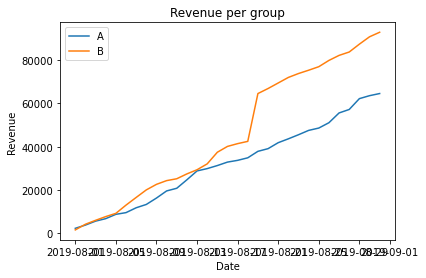

In [20]:
# Plotting the group A revenue graph 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
# Plotting the group B revenue graph 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend()
plt.title('Revenue per group')
plt.xlabel('Date', size=10)
plt.ylabel('Revenue', size=10);

As we can see here in the graph. the revenue for Group B has bigger revenue and  is steadily going up since it started on 2019-08-01 however it has spikes in revenue around in the middle of the test, this might mean like surge of orders of a presence of expensive orders. ThWhile the group A has made a consistent steady grow with very few spikes.

<p><a name="cummavg"></a></p>

* **Cumulative average order size by group.**

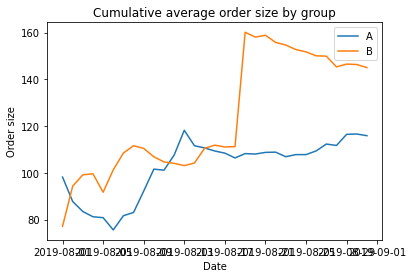

In [21]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Cumulative average order size by group')
plt.xlabel('Date', size=10)
plt.ylabel('Order size', size=10);

Average purchase size for group A  falls before it started to climb up and stabilizes afterwards, while the fluctuating graph of group B looks anomalous and should be look into and further investigated as it might be due to surge of orders or very exoensive orders. We need more data on this group to find the true average purchase size and establish its level.

<p><a name="reldiff"></a></p>

* **Relative difference in cumulative average order size for group B compared with group A.**

In [22]:
# gathering the data into one DataFrame
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

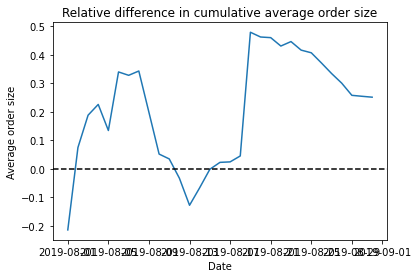

In [23]:
# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative average order size')
plt.xlabel('Date', size=10)
plt.ylabel('Average order size', size=10);

The fluctuation of the graph might be due to orders that are considered ouliers that should be look into later.

<p><a name="conversionrate"></a></p>

* **Conversion rate of each group as the ratio of orders to the number of visits for each day.**


In [24]:
# calculating cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [25]:
# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataA.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
2,2019-08-02,A,44,38,3860.3,1338,0.032885
4,2019-08-03,A,68,62,5675.5,1845,0.036856
6,2019-08-04,A,84,77,6822.1,2562,0.032787
8,2019-08-05,A,109,100,8810.2,3318,0.032851


In [26]:
# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
cumulativeDataB.head()

,date,group,orders,buyers,revenue,visitors,conversion
1,2019-08-01,B,21,20,1620.0,713,0.029453
3,2019-08-02,B,45,43,4243.8,1294,0.034776
5,2019-08-03,B,61,59,6050.6,1803,0.033833
7,2019-08-04,B,78,75,7767.9,2573,0.030315
9,2019-08-05,B,101,98,9262.9,3280,0.030793


* **The daily conversion rates of the two groups and description of the difference.**

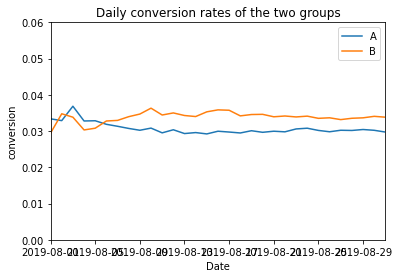

In [27]:
# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# setting the axes' scale
plt.axis(["2019-08-01", '2019-08-31', 0, 0.06])
plt.title('Daily conversion rates of the two groups')
plt.xlabel('Date', size=10)
plt.ylabel('conversion', size=10);

Our graphs are symmetrical. The groups were fluctuating around the same value, but then the conversion rate of group B drops before raising a little bit and stabilizing, while the conversion rate of group A slowly decreses before it stabilizes but it was consistently lower than group B.

In [28]:
# calculating the cumulative conversion of each group
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],
                                                                           left_on='date', right_on='date', how='left',
                                                                           suffixes=['A', 'B'])

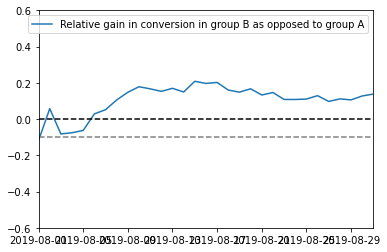

In [29]:
#plotting a graph for the relative gain of group B
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']
         /mergedCumulativeConversions['conversionA']-1, label="Relative gain in conversion in group B as opposed to group A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-08-31', -0.6, 0.6]) ;

At the beginning of the test, group B started lower, but then it consistently took the lead and even went up to 20% higher than group A in the middle of the month, it has a gradual slight fall but went steady and gradually going up again at the end of the month.

<p><a name="orderscatter"></a></p>

* **Scatter chart of the number of orders per user.**

In [30]:
#droping the columns group, revenue and date and aggregating the visitorsID and transaction id to unique users
Userorders = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
Userorders.columns = ['userId','orders']
print(Userorders.sort_values(by='orders',ascending=False).head())

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5


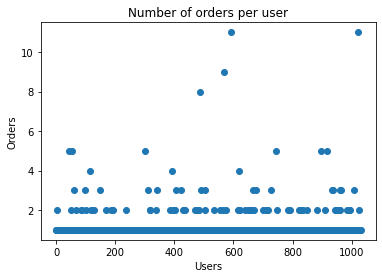

In [31]:
# the range of numbers from 0 to the number of observations in ordersByUsers
x_values = pd.Series(range(0,len(Userorders)))
plt.scatter(x_values, Userorders['orders'])
plt.title('Number of orders per user')
plt.xlabel('Users', size=10)
plt.ylabel('Orders', size=10);

By using scatter plot we can see that some users which has more than 2 orders seems to turn out as ouliers.majority of the users has 1 and 2 orders.

<p><a name="orders9599"></a></p>

* **The 95th and 99th percentiles for the number of orders per user and the definition of the point at which a data point becomes an anomaly.**

In [32]:
# calculate the percentiles or orders.
print(np.percentile(Userorders['orders'], [95, 99]))

[2. 4.]


By calculating the 95th, and 99th percentiles for users order we get the result of 2 and 4. This means that not more than 5% of users has 2 orders , and not more than 1% of users has 4 orders.Anything above those number becomes and anomaly.

<p><a name="revscatter"></a></p>

* **Scatter chart of order prices.**

In [33]:
print(orders.sort_values(by='revenue',ascending=False).head())

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
858       192721366  1316129916 2019-08-27   1450.2     A
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B


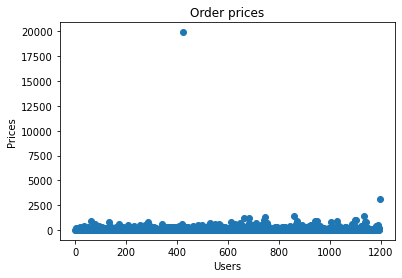

In [34]:
# make scatter plot of  order prices by getting the len of revenue column
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Order prices')
plt.xlabel('Users', size=10)
plt.ylabel('Prices', size=10);

There are 2 orders that are considered outliear one that is over 2500 and the other is 20000.

<p><a name="9599rev"></a></p>

* **The 95th and 99th percentiles of order prices and the definition at the point  which a data point becomes an anomaly.**

In [35]:
print(np.percentile(orders['revenue'], [95, 99])) 

[435.54  900.904]


Looking at the result of percentile we could see that not more than 5% of orders cost more than 435.54, and not more than 1% cost more than 900.904.When the data point behavior would differs from the normal pattern then it becomes anomalous.

<p><a name="rawstatdiff"></a></p>

* **The statistical significance of the difference in conversion between the groups using the raw data.**

In [36]:
#make a dataframe separating the orders of group A and aggregating the unique transaction and visitors id
ordersUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersUsersA.columns = ['userId', 'orders']

In [37]:
#make a dataframe separating the orders of group A and aggregating the unique transaction and visitors id
ordersUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersUsersB.columns = ['userId', 'orders'] 

In [38]:

GroupA = pd.concat([ordersUsersA['orders'],pd.Series
                     (0, index=np.arange(visits[visits['group']=='A']
                    ['visits'].sum() - len(ordersUsersA['orders'])), name='orders')],axis=0)

In [39]:
GroupB = pd.concat([ordersUsersB['orders'],
                     pd.Series(0, index=np.arange(visits[visits['group']=='B']
                    ['visits'].sum() - len(ordersUsersB['orders'])), name='orders')],axis=0) 

In [40]:
print("{0:.5f}".format(stats.mannwhitneyu(GroupA, GroupB)[1]))
print("{0:.5f}".format(GroupB.mean()/GroupA.mean()-1)) 

0.00840
0.13808


The first row of the output gives us the p-value, 0.00840, which is lower than 0.05. So we  reject the null hypothesis that there's not a statistically significant difference in conversion between the groups. But there is a relative gain conversion of group B which is 93% (the second row of the output).

<p><a name="avgstatdiff"></a></p>

* **The statistical significance of the difference in average order size between the groups using the raw data.**

In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.346
0.252


The p-value is considerably higher than 0.05, so there's no reason to reject the null hypothesis and conclude that average order size differs between the groups. Nonetheless, the average order size for group B is much smaller than it is for group A by 27%.

<p><a name="filstatdiff"></a></p>

* **The statistical significance of the difference in conversion between the groups using the filtered data.**

In [42]:
# We remove the 5% of users with the largest numbers of orders
ManyOrdersusers = pd.concat([ordersUsersA[ordersUsersA['orders'] > 2]['userId'],
                                 ordersUsersB[ordersUsersB['orders'] > 2]['userId']], axis = 0)

In [43]:
#we will remove the 5% of users with expensive orders
ExpensiveOrdersusers = orders[orders['revenue'] > 435]['visitorId']

In [44]:
# Determining the outliers and naming them anomalous users.
anomalousUsers = pd.concat([ManyOrdersusers, ExpensiveOrdersusers], axis = 0).drop_duplicates().sort_values()
print(anomalousUsers.head())
print(anomalousUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
(75,)


there are 75 anomalous users the we have to remove to filter the data.

In [45]:
#filter the group A from anomalous users
GroupAFiltered = pd.concat([ordersUsersA[np.logical_not(ordersUsersA['userId']
                            .isin(anomalousUsers))]['orders'],pd.Series
                             (0, index=np.arange(visits[visits['group']=='A']['visits'].sum() 
                            - len(ordersUsersA['orders'])),name='orders')],axis=0)

In [46]:
#filter the group A from anomalous users
GroupBFiltered = pd.concat([ordersUsersB[np.logical_not(ordersUsersB['userId']
                            .isin(anomalousUsers))]['orders'],pd.Series
                             (0, index=np.arange(visits[visits['group']=='B']['visits'].sum() 
                            - len(ordersUsersB['orders'])),name='orders')],axis=0) 

In [47]:
# we will apply the statistical Mann-Whitney criterion to the resulting samples:
print("{0:.5f}".format(stats.mannwhitneyu(GroupAFiltered, GroupBFiltered)[1]))
print("{0:.5f}".format(GroupBFiltered.mean()/GroupAFiltered.mean()-1))

0.00709
0.17067


After filtering the data from outliers, the in the result was the same from the raw data the gorup B is still doing better in terms of costumer conversion compared to group A with statistical difference of 96 %

<p><a name="avgfilstatdiff"></a></p>

* **The statistical significance of the difference in average order size between the groups using the filtered data.**

In [48]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(anomalousUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(anomalousUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(anomalousUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(anomalousUsers)))]['revenue'].mean() - 1)) 


0.375
-0.027


Filtering the data from outliers makes the p-value of Group A increased, but the difference between the segments is 107.2% instead of 27%.The average order size for group B is much smaller than it is for group A.

<p><a name="testdecision"></a></p>

* **Decision based on the test results.**

After filtering the raw data from outliers we had a clearer result of the test as the noise was reduced, and  As for the Test i would say we have to stop the test since we already prove that Group B doesnt have enough data to reach the significance level in terms of revenue, It has more conversion of customers compared to group A.But a conversion doesn’t necessarily have to be a sale or transaction, though it is a central aspect of online marketing and search engine optimization, as an improved conversion rate can have a significant impact on lead generation, and therefore sales and revenue. But in this case here, in terms of revenue is not generationg enough and is worse than A.
